<a href="https://colab.research.google.com/github/LuisRodarteSolorzano/Analisis_de_datos_con_Python/blob/main/Copia_de_505_regresion_lineal_SIMPLE_MULTIPLE_solo_variables_cuantitativas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de librerías

- **pandas (pd)**: Facilita la manipulación y análisis de datos con estructuras de datos potentes y flexibles. https://pandas.pydata.org/
- **seaborn (sns)**: Permite crear visualizaciones de datos estadísticos informativas y atractivas con facilidad. https://seaborn.pydata.org/examples/index.html
- **plotly.express (px)**: Ofrece herramientas para crear gráficos interactivos y complejos de manera sencilla. https://plotly.com/python/
- **statsmodels.api (sm)**: Proporciona funciones para la estimación de muchos modelos estadísticos y la realización de pruebas estadísticas. https://www.statsmodels.org/stable/index.html
- **matplotlib.pyplot (plt)**: Es una biblioteca fundamental para la creación de gráficos y visualizaciones en Python. https://matplotlib.org/
- **statsmodels.tools.eval_measures (smt)**: Brinda herramientas para evaluar y comparar diferentes modelos estadísticos y de machine learning.
- **numpy (np)**: Esencial para la computación científica en Python, proporcionando soporte para arrays y matrices, junto con una colección de funciones matemáticas. https://numpy.org/

In [ ]:
# @title
# Required Libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as smt
import numpy as np

In [ ]:
def explorar_cuantitativas(df):
    """
    Genera histogramas y boxplots para todas las variables cuantitativas en el DataFrame.
    """
    variables_cuantitativas = df.select_dtypes(include=['float64', 'int64']).columns
    for col in variables_cuantitativas:
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        sns.histplot(df[col], kde=True, ax=axs[0])
        axs[0].set_title(f'Histograma de {col}')

        sns.boxplot(x=df[col], ax=axs[1])
        axs[1].set_title(f'Boxplot de {col}')

        plt.tight_layout()
        plt.show()

def explorar_cualitativas(df):
    """
    Genera gráficos de barras para todas las variables cualitativas en el DataFrame.
    """
    variables_cualitativas = df.select_dtypes(include=['object', 'category']).columns
    for col in variables_cualitativas:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=df[col])
        plt.title(f'Gráfico de Barras de {col}')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
from scipy.stats import pearsonr

def explorar_relacion_con_salida(df, variable_salida):
    """
    Genera diagramas de dispersión con líneas de tendencia para cada variable cuantitativa
    en relación con la variable de salida especificada y muestra el coeficiente de correlación R.
    """
    variables_entrada = df.select_dtypes(include=['float64', 'int64']).columns
    variables_entrada = [col for col in variables_entrada if col != variable_salida]

    for col in variables_entrada:
        plt.figure(figsize=(8, 5))
        sns.regplot(x=col, y=variable_salida, data=df, line_kws={"color": "red"})

        # Calcula el coeficiente de correlación
        corr, _ = pearsonr(df[col], df[variable_salida])
        plt.title(f'Relación entre {col} y {variable_salida} - R: {corr:.2f}')

        plt.show()


In [ ]:
def explorar_relacion_cuantitativa_categorica(df, variable_cuantitativa):
    """
    Genera gráficos de barras de error (sin las barras, solo los IC) y boxplots lado a lado para
    explorar la relación entre una variable cuantitativa y cada una de las variables categóricas en el DataFrame.
    """
    variables_categoricas = df.select_dtypes(include=['object', 'category']).columns

    for col in variables_categoricas:
        fig, axs = plt.subplots(1, 2, figsize=(16, 5))

        # Gráfico de barras de error
        sns.pointplot(x=col, y=variable_cuantitativa, data=df, ci="sd", ax=axs[0])
        axs[0].set_title(f'Medias de {variable_cuantitativa} con IC por {col}')

        # Boxplot
        sns.boxplot(x=col, y=variable_cuantitativa, data=df, ax=axs[1])
        axs[1].set_title(f'Distribución de {variable_cuantitativa} por {col}')

        plt.tight_layout()
        plt.show()

# Lectura de datos de mtcars

El conjunto de datos `mtcars` es un conjunto de datos clásico disponible en R y también accesible a través de `statsmodels` en Python. Originalmente proviene del conjunto de datos `Motor Trend Car Road Tests` y comprende diversos aspectos de diseño y rendimiento de 32 automóviles (modelos de 1973-74).

Veamos los detalles de las variables que contiene:

1. **mpg**: Millas por galón (eficiencia de combustible).
2. **cyl**: Número de cilindros.
3. **disp**: Desplazamiento (volumen de desplazamiento del motor, en pulgadas cúbicas).
4. **hp**: Caballos de fuerza.
5. **drat**: Relación del eje trasero.
6. **wt**: Peso (en miles de libras).
7. **qsec**: Tiempo que el vehículo tarda en recorrer 1/4 de milla (un indicador de aceleración).
8. **vs**: Tipo de motor (0 = motor en V, 1 = motor en línea).
9. **am**: Tipo de transmisión (0 = automática, 1 = manual).
10. **gear**: Número de marchas.
11. **carb**: Número de carburadores.

In [ ]:
# Load and reconfigure the data table

df = sm.datasets.get_rdataset("mtcars")
df = df.data
# sustiuyes por una lectora de csv, de un excel con pandas...

df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [ ]:
df.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object', name='rownames')

In [ ]:
df.shape

(32, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 4.0+ KB


In [ ]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
df = df[["wt","disp","hp","mpg"]]
df.head()
df["mpg"] = 1/df["mpg"] # Calculating consumption
df.rename(columns={"wt":"weight","disp":"displacement","hp":"horsepower","mpg":"consumption"}, inplace=True)
df.head()

<ipython-input-41-c77f4511c4d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mpg"] = 1/df["mpg"] # Calculating consumption
<ipython-input-41-c77f4511c4d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"wt":"weight","disp":"displacement","hp":"horsepower","mpg":"consumption"}, inplace=True)


,weight,displacement,horsepower,consumption
rownames,,,,
Mazda RX4,2.620,160.0,110,0.047619
Mazda RX4 Wag,2.875,160.0,110,0.047619
Datsun 710,2.320,108.0,93,0.043860
Hornet 4 Drive,3.215,258.0,110,0.046729
Hornet Sportabout,3.440,360.0,175,0.053476


In [ ]:
df.head()

,weight,displacement,horsepower,consumption
rownames,,,,
Mazda RX4,2.620,160.0,110,0.047619
Mazda RX4 Wag,2.875,160.0,110,0.047619
Datsun 710,2.320,108.0,93,0.043860
Hornet 4 Drive,3.215,258.0,110,0.046729
Hornet Sportabout,3.440,360.0,175,0.053476


# Descriptiva de las relaciones de las variables

## Descripción univariada

In [ ]:
df.describe()

,weight,displacement,horsepower,consumption
count,32.000000,32.000000,32.000000,32.000000
mean,3.217250,230.721875,146.687500,0.054227
std,0.978457,123.938694,68.562868,0.016424
min,1.513000,71.100000,52.000000,0.029499
25%,2.581250,120.825000,96.500000,0.043860
50%,3.325000,196.300000,123.000000,0.052083
75%,3.610000,326.000000,180.000000,0.064834
max,5.424000,472.000000,335.000000,0.096154


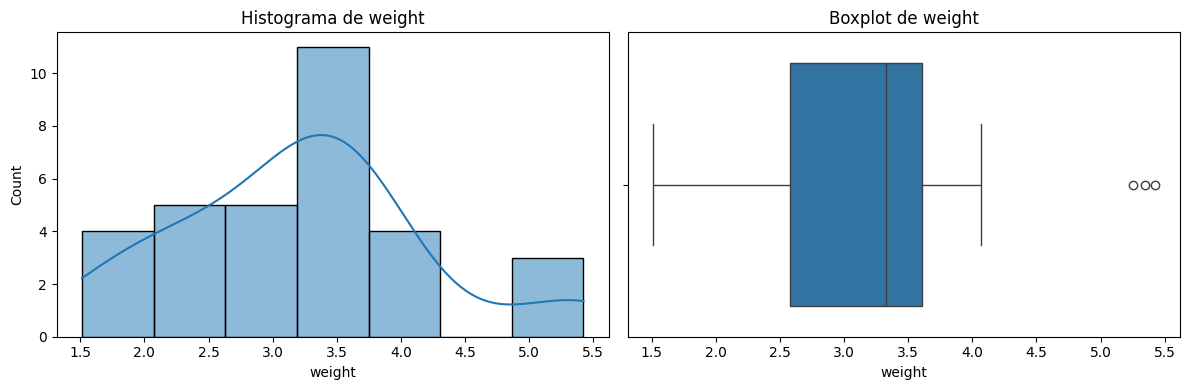

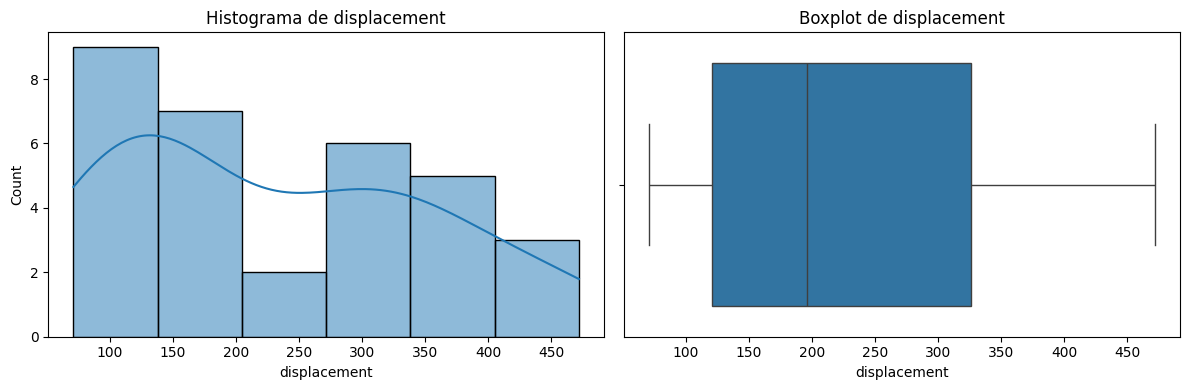

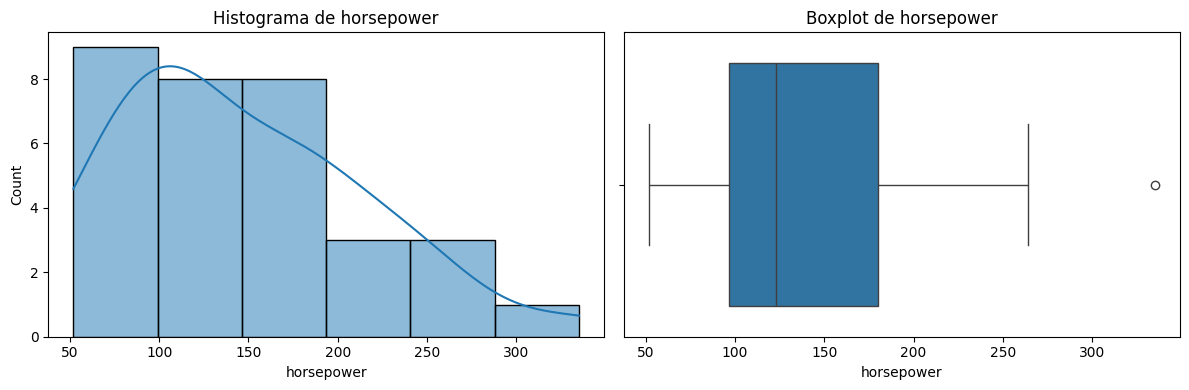

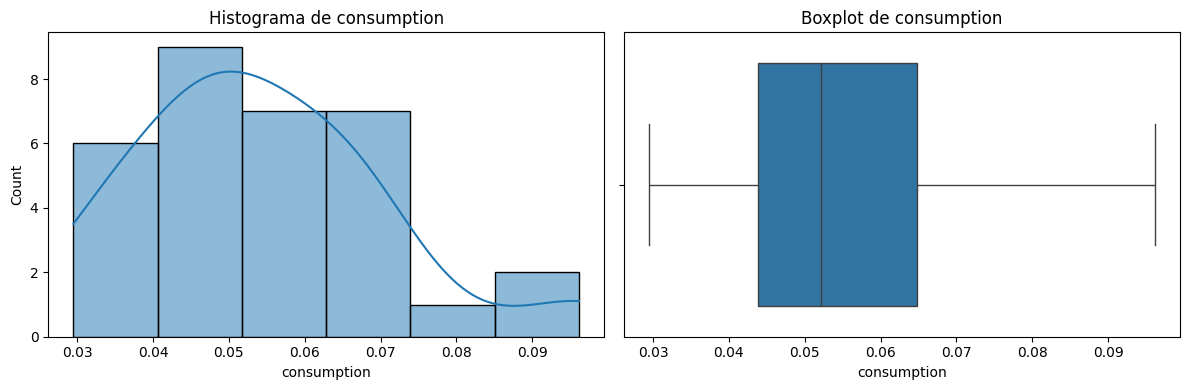

In [ ]:
 explorar_cuantitativas(df)

## Descripción multivariada

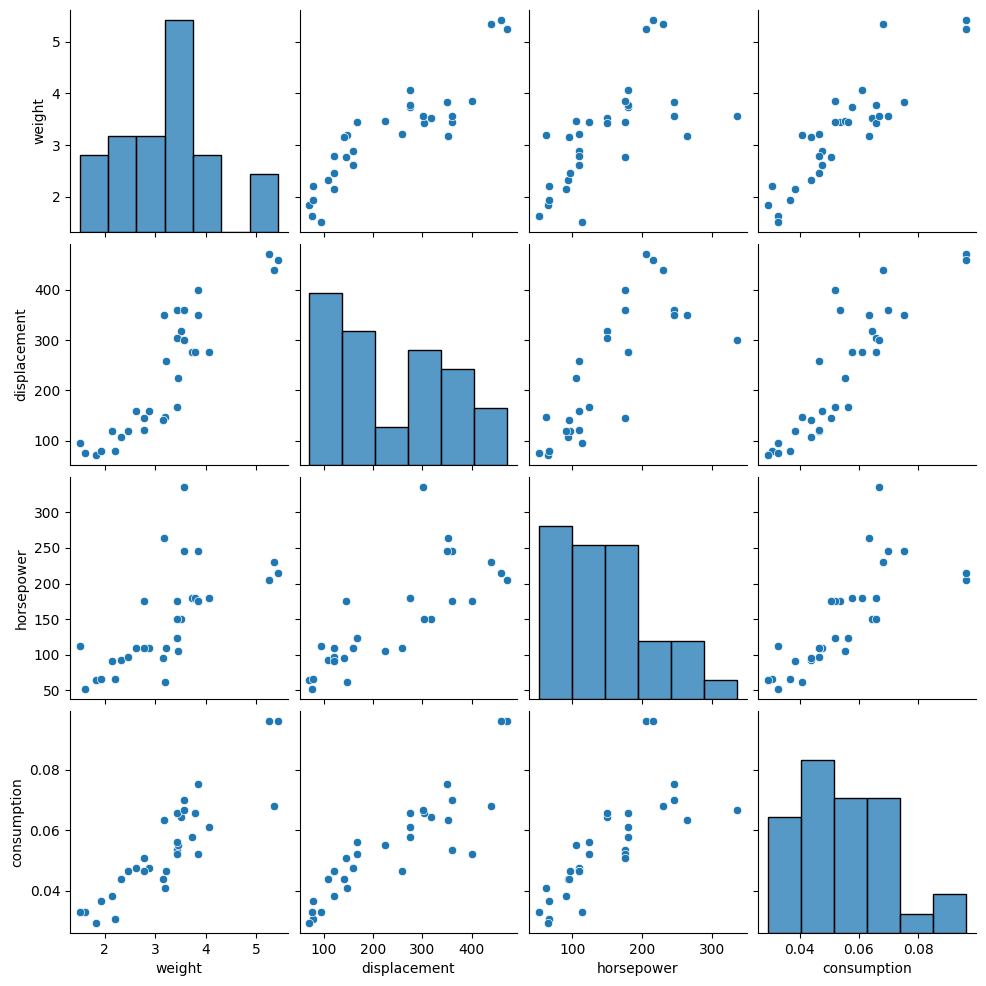

In [ ]:
# Description
sns.pairplot(df)
plt.show()

# Regresión lineal simple y visualización de los residuos

## Regresión lineal simple con stats models

In [ ]:
df.columns

Index(['weight', 'displacement', 'horsepower', 'consumption'], dtype='object')

In [ ]:
df.head()

,weight,displacement,horsepower,consumption
rownames,,,,
Mazda RX4,2.620,160.0,110,0.047619
Mazda RX4 Wag,2.875,160.0,110,0.047619
Datsun 710,2.320,108.0,93,0.043860
Hornet 4 Drive,3.215,258.0,110,0.046729
Hornet Sportabout,3.440,360.0,175,0.053476


In [ ]:
# Model
model = sm.OLS.from_formula("consumption ~ weight", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     114.2
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           9.57e-12
Time:                        15:14:07   Log-Likelihood:                 111.71
No. Observations:                  32   AIC:                            -219.4
Df Residuals:                      30   BIC:                            -216.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0062      0.005      1.314      0.1

consumption = 0.0062 + 0.0149·weight + error

## Normalidad de los residuos

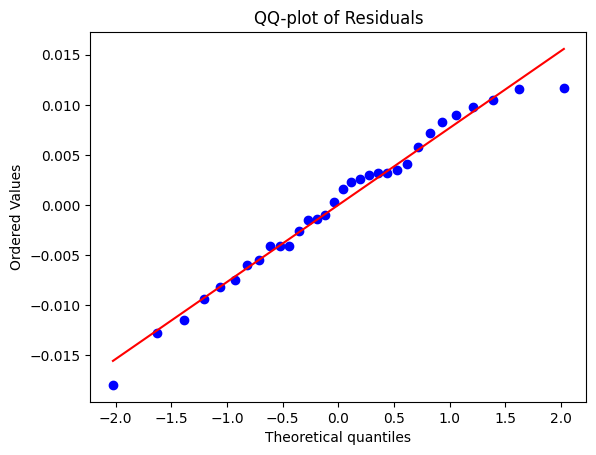

In [ ]:
# Residuals review
#*******************************************************************************
# · 2D scatter to check no autocorrelation
# · Check if they are normally distributed
# · Check collinearity with VIF coefficient
# 2D scatter of residuals
residuals = result.resid
df_residuals = pd.DataFrame({"Residuals":residuals})

# 2D scatter
fig = px.scatter(df_residuals, x=df_residuals.index, y='Residuals', title='Residuals Linear Regression')
fig.show()

# Frequency histogram with plotly
fig = px.histogram(df_residuals, x='Residuals', title='Frequency Histogram of Residuals')
fig.show()

# Boxplot
fig = px.box(df_residuals, y='Residuals', title='Boxplot of Residuals')
fig.show()

# QQplot
import scipy.stats as stats
import pylab

# Generating the qqplot
stats.probplot(df_residuals['Residuals'], dist="norm", plot=pylab)
pylab.title("QQ-plot of Residuals")
pylab.show()

In [ ]:
# Normal distribution test
stats.shapiro(df_residuals['Residuals'])

ShapiroResult(statistic=0.9740986227989197, pvalue=0.619229257106781)

# Regresión lineal múltiple, colinealidad, comparar modelos con el BIC

## Regresión lineal múltiple con Stats Models

In [ ]:
# Model
model = sm.OLS.from_formula("consumption ~ weight + horsepower + displacement", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     53.63
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           9.94e-12
Time:                        15:22:00   Log-Likelihood:                 117.13
No. Observations:                  32   AIC:                            -226.3
Df Residuals:                      28   BIC:                            -220.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0095      0.005      1.784   

In [ ]:
# Collinearity of the Model
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(result.model.exog, exog_idx=2)

2.7366326916912316

## Visualización de los residuos y normalidad

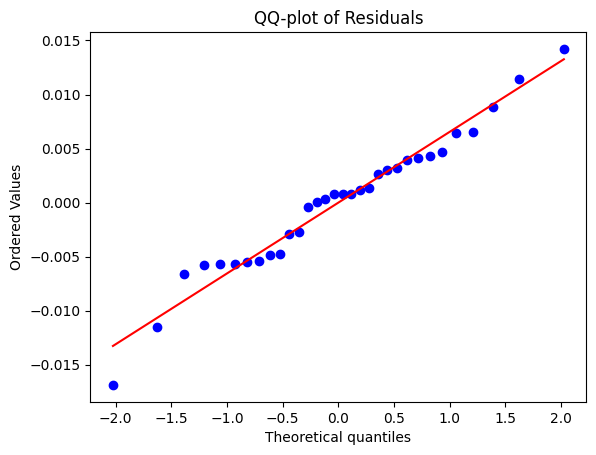

In [ ]:
# Residuals review
#*******************************************************************************
# · 2D scatter to check no autocorrelation
# · Check if they are normally distributed
# · Check collinearity with VIF coefficient
# 2D scatter of residuals
residuals = result.resid
df_residuals = pd.DataFrame({"Residuals":residuals})

# 2D scatter
fig = px.scatter(df_residuals, x=df_residuals.index, y='Residuals', title='Residuals Linear Regression')
fig.show()

# Frequency histogram with plotly
fig = px.histogram(df_residuals, x='Residuals', title='Frequency Histogram of Residuals')
fig.show()

# Boxplot
fig = px.box(df_residuals, y='Residuals', title='Boxplot of Residuals')
fig.show()

# QQplot
import scipy.stats as stats
import pylab

# Generating the qqplot
stats.probplot(df_residuals['Residuals'], dist="norm", plot=pylab)
pylab.title("QQ-plot of Residuals")
pylab.show()

In [ ]:
# Normal distribution test
stats.shapiro(df_residuals['Residuals'])

ShapiroResult(statistic=0.9753886461257935, pvalue=0.6589179635047913)

## Colinealidad de las variables explicativas o de entrada

In [ ]:
# Collinearity of the Model
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(result.model.exog, exog_idx=2)

1.766624579268279

VIF starts at 1 and has no upper limit

VIF = 1, no correlation between the independent variable and the other variables

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

## Comparativa de modelos con el BIC

In [ ]:
# MODEL 2
#*******************************************************************************

# Removing displacement variable because we know it's highly related to consumption
# and we want to see other variables that influence.
model2 = sm.OLS.from_formula("consumption ~ weight + horsepower", data=df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     80.33
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.49e-12
Time:                        15:23:23   Log-Likelihood:                 116.64
No. Observations:                  32   AIC:                            -227.3
Df Residuals:                      29   BIC:                            -222.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0063      0.004      1.540      0.1

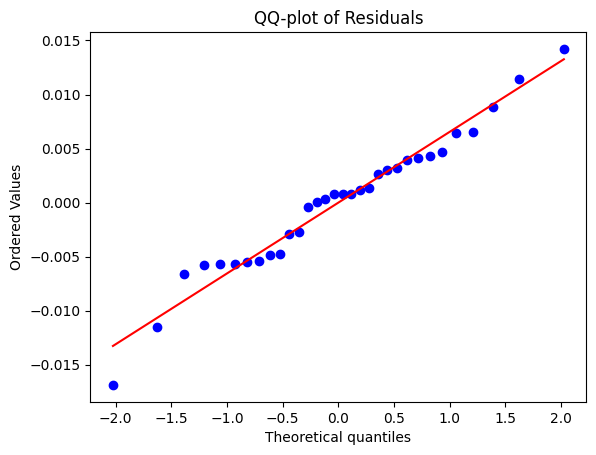

In [ ]:
# Residuals review
#*******************************************************************************
# · 2D scatter to check no autocorrelation
# · Check if they are normally distributed
# · Check collinearity with VIF coefficient

# 2D scatter of residuals
residuals2 = result2.resid
df_residuals2 = pd.DataFrame({"Residuals":residuals2})

# 2D scatter
fig = px.scatter(df_residuals2, x=df_residuals2.index, y='Residuals', title='Residuals Linear Regression')
fig.show()

# Frequency histogram with plotly
fig = px.histogram(df_residuals2, x='Residuals', title='Frequency Histogram of Residuals')
fig.show()

# Boxplot
fig = px.box(df_residuals2, y='Residuals', title='Boxplot of Residuals')
fig.show()

# Generating the qqplot
stats.probplot(df_residuals2['Residuals'], dist="norm", plot=pylab)
pylab.title("QQ-plot of Residuals")
pylab.show()

In [ ]:
# Normal distribution test
stats.shapiro(df_residuals2['Residuals'])

ShapiroResult(statistic=0.9753886461257935, pvalue=0.6589179635047913)

In [ ]:
# Collinearity of the Model
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(result2.model.exog, exog_idx=2)

1.766624579268279

In [ ]:
# Calculate the BIC index modelo 1
bic1 = result.bic
print("The BIC index for model1 is:", bic1)

The BIC index for model1 is: -220.4055080262198


In [ ]:
# Calculate the BIC index modelo 2
bic2 = result2.bic
print("The BIC index for model2 is:", bic2)

The BIC index for model2 is: -222.87479419556857


# Cómo interpretar los coeficientes

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     53.63
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           9.94e-12
Time:                        15:24:49   Log-Likelihood:                -14.861
No. Observations:                  32   AIC:                             37.72
Df Residuals:                      28   BIC:                             43.59
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.498e-16      0.073   3.43e-15   

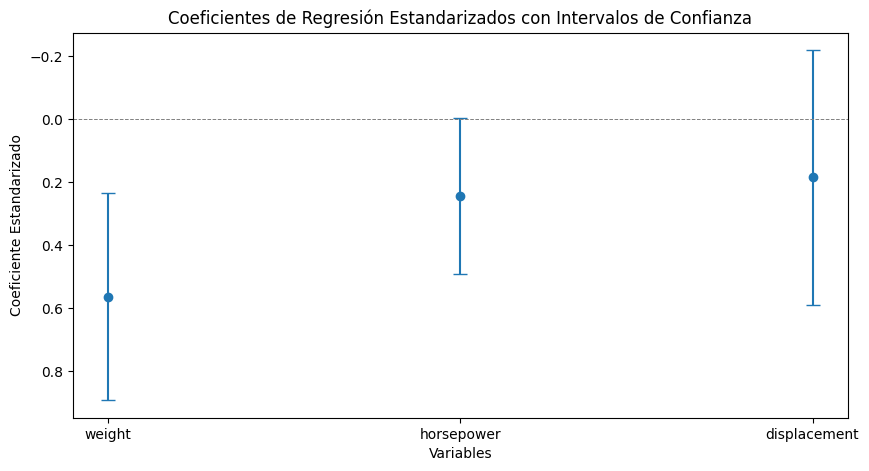

In [ ]:
from sklearn.preprocessing import StandardScaler

# Suponiendo que 'df' es tu DataFrame original
# Estandarizando las variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['weight', 'horsepower', 'displacement', 'consumption']]),
                         columns=['weight', 'horsepower', 'displacement', 'consumption'])

# Ajustando el modelo con variables estandarizadas
model = sm.OLS.from_formula("consumption ~ weight + horsepower + displacement", data=df_scaled)
result_scaled = model.fit()
print(result_scaled.summary())

# Asumiendo que result_scaled es tu modelo ajustado
coef = result_scaled.params
conf = result_scaled.conf_int()
conf['Coef'] = coef
conf.columns = ['Lower CI', 'Upper CI', 'Coef']
conf.drop('Intercept', inplace=True)  # Excluir el intercepto

# Calcular errores para las barras de error (distancia desde el coeficiente a cada extremo del intervalo de confianza)
conf['error_neg'] = conf['Coef'] - conf['Lower CI']
conf['error_pos'] = conf['Upper CI'] - conf['Coef']

# Preparar datos para el gráfico
x_labels = conf.index
x_values = range(len(x_labels))
y_values = conf['Coef']
y_errors = [conf['error_neg'], conf['error_pos']]

# Crear el gráfico
plt.figure(figsize=(10, 5))
plt.errorbar(y=y_values, x=x_values, yerr=y_errors, fmt='o', capsize=5)
plt.xticks(ticks=x_values, labels=x_labels)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.title('Coeficientes de Regresión Estandarizados con Intervalos de Confianza')
plt.ylabel('Coeficiente Estandarizado')
plt.xlabel('Variables')
plt.gca().invert_yaxis()  # Invertir el eje y para un mejor formato
plt.show()

# Mejor distribución para una variable respuesta cuantitativa

La mejor distribución ajustada es: gamma


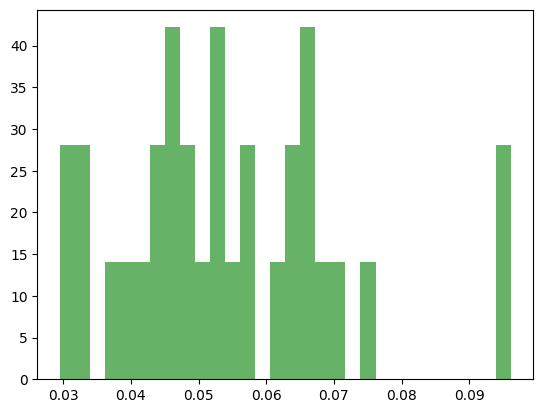

In [ ]:
import scipy.stats as stats

# Supongamos que df['respuesta'] es tu variable de respuesta
data = df['consumption']

# Visualización con un histograma
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Probando distintas distribuciones
distributions = [stats.norm, stats.lognorm, stats.gamma, stats.expon, stats.invgauss]
mles = []

for distribution in distributions:
    # Ajustar la distribución a los datos
    params = distribution.fit(data)

    # Separar los parámetros
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calcular el logaritmo de la verosimilitud
    mle = np.sum(np.log(distribution.pdf(data, *arg, loc=loc, scale=scale)))
    mles.append(mle)

# Comparar resultados
best_fit = distributions[np.argmax(mles)]

print(f"La mejor distribución ajustada es: {best_fit.name}")

# Ejemplo carseat

In [ ]:
# Cargar el conjunto de datos
data = sm.datasets.get_rdataset("Carseats", "ISLR").data

# Mostrar las primeras filas del DataFrame
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Exploración del dataset

In [ ]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


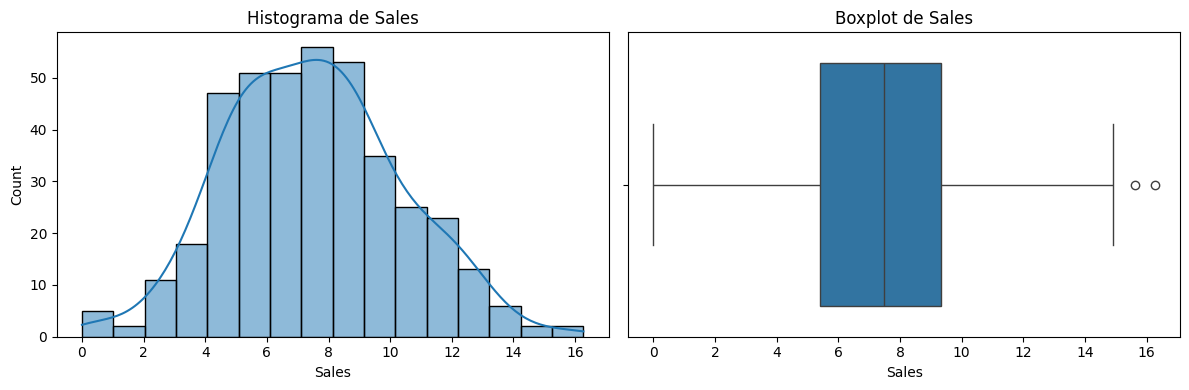

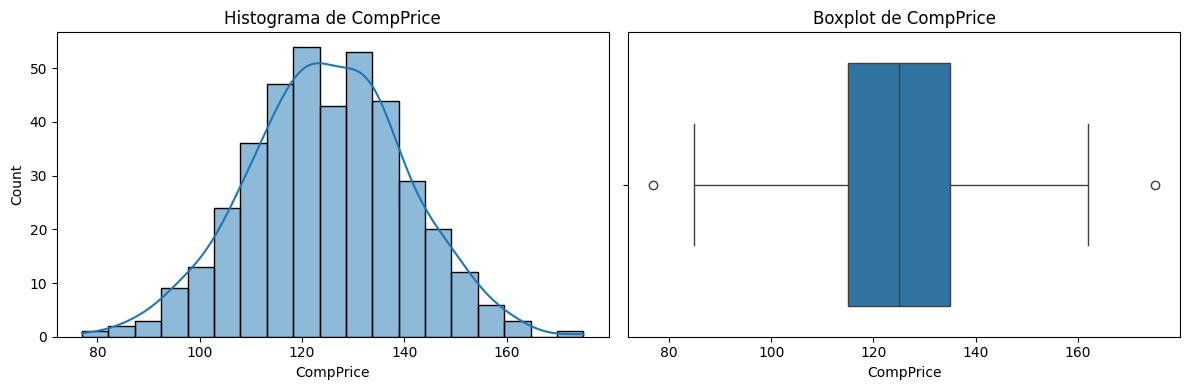

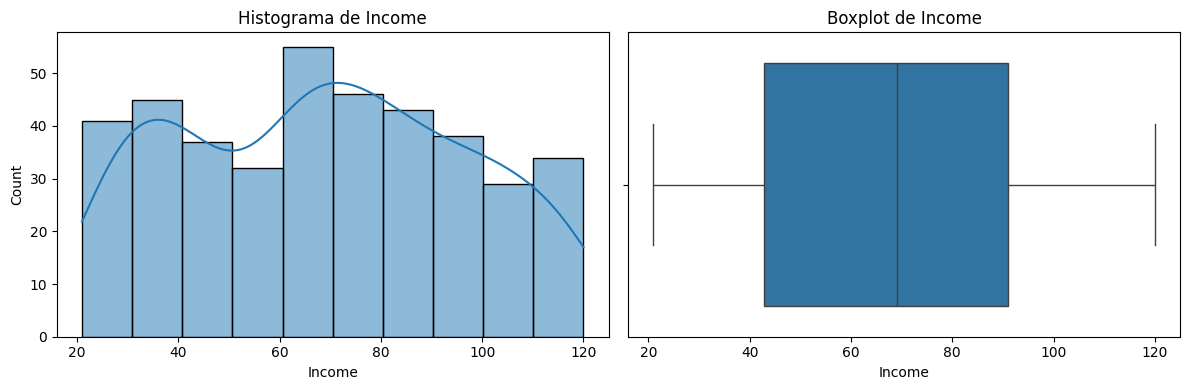

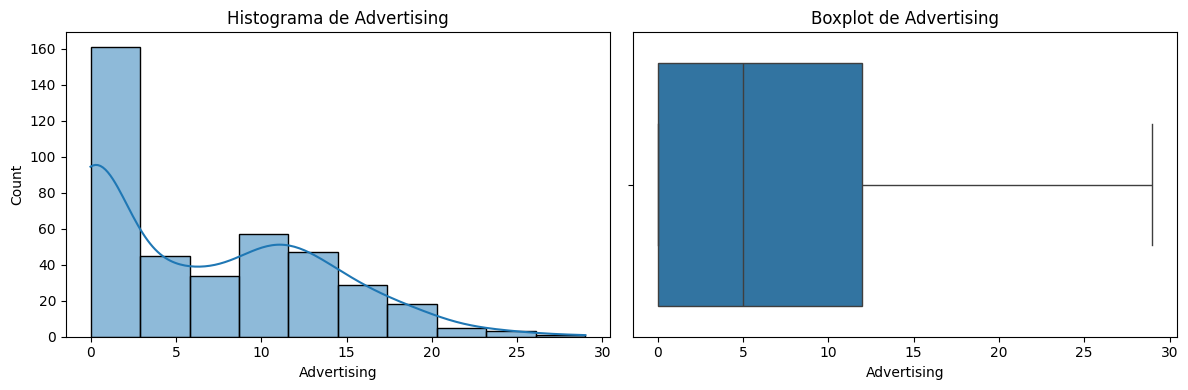

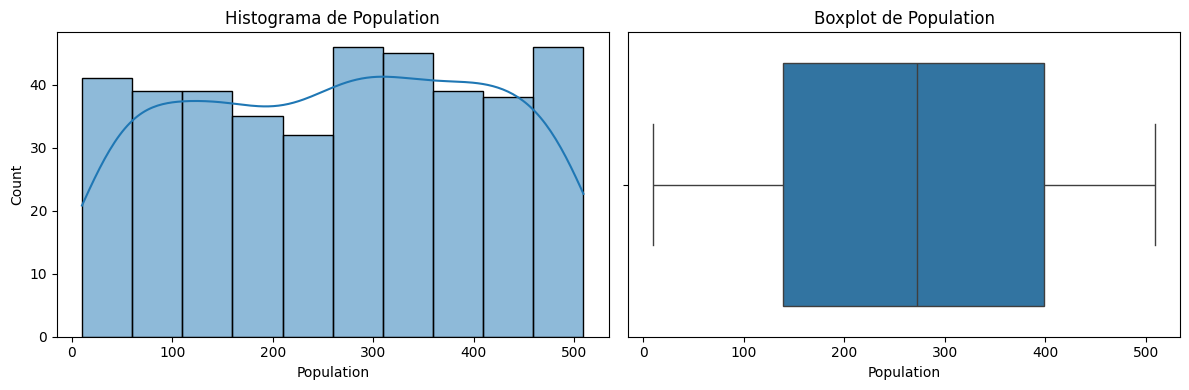

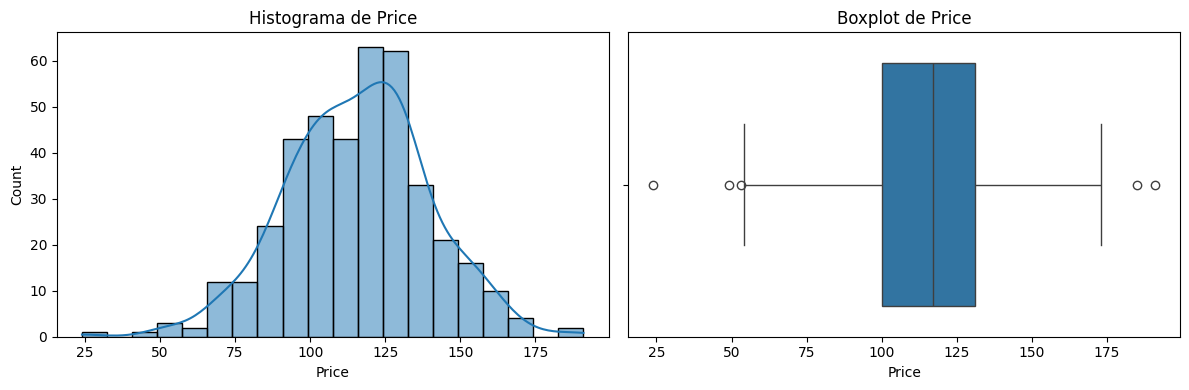

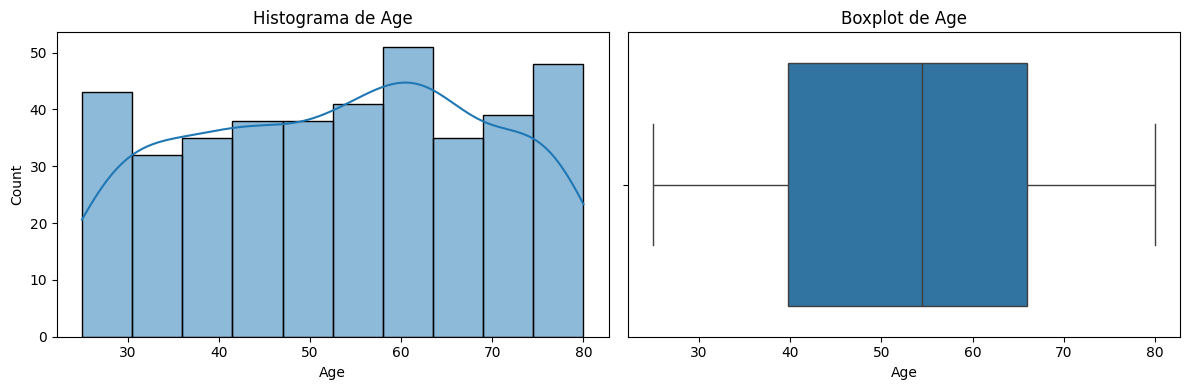

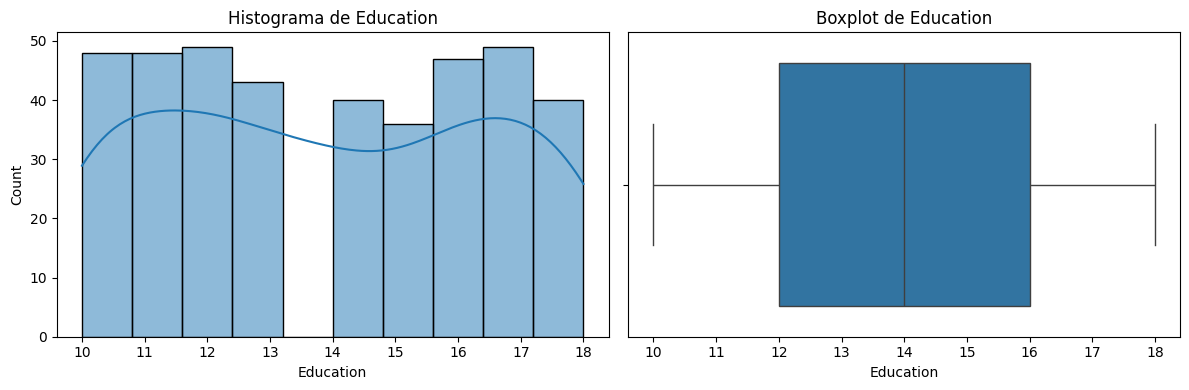

In [ ]:
explorar_cuantitativas(data)

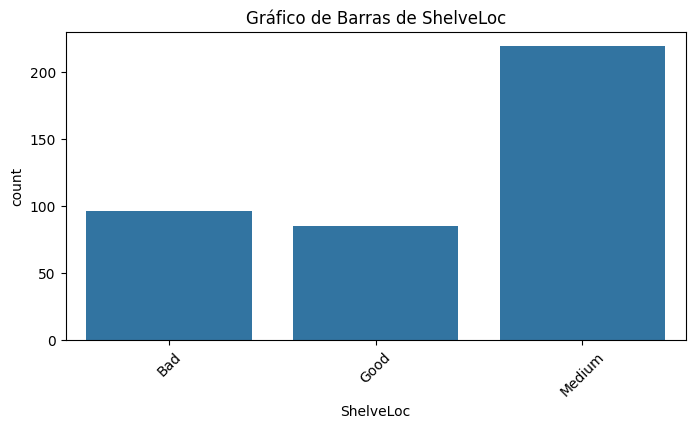

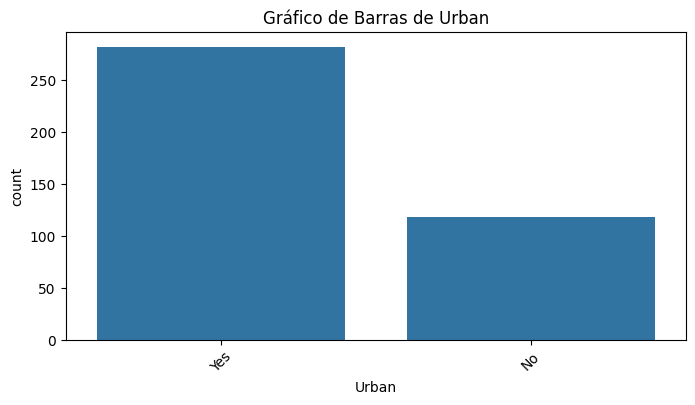

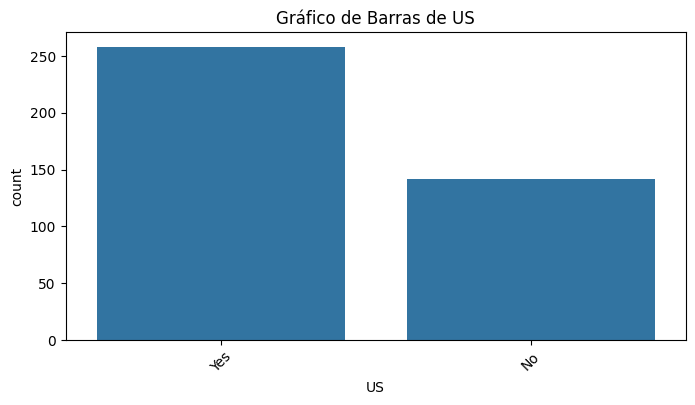

In [ ]:
explorar_cualitativas(data)

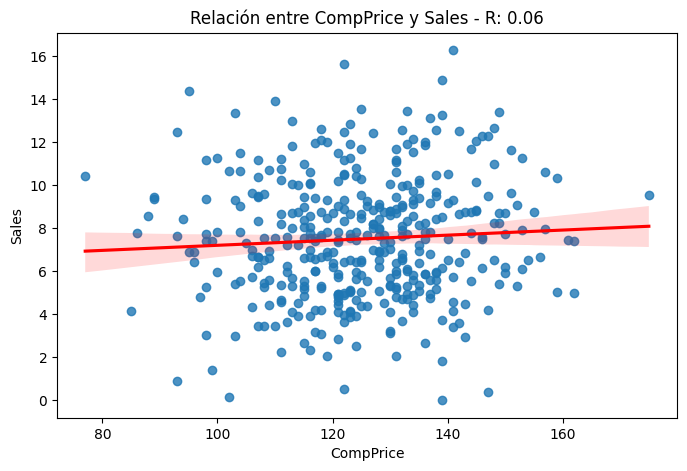

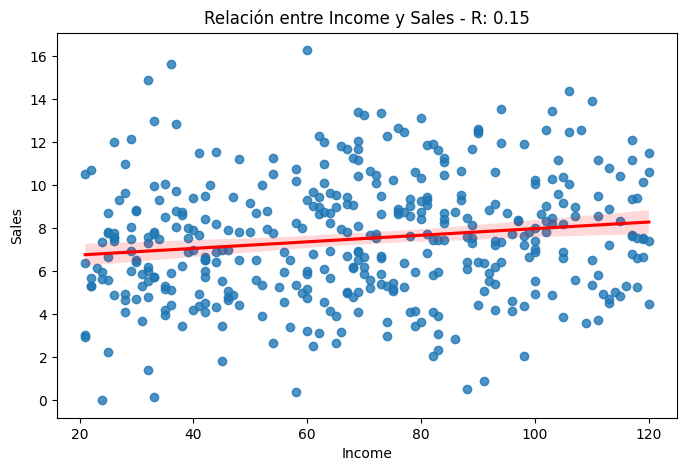

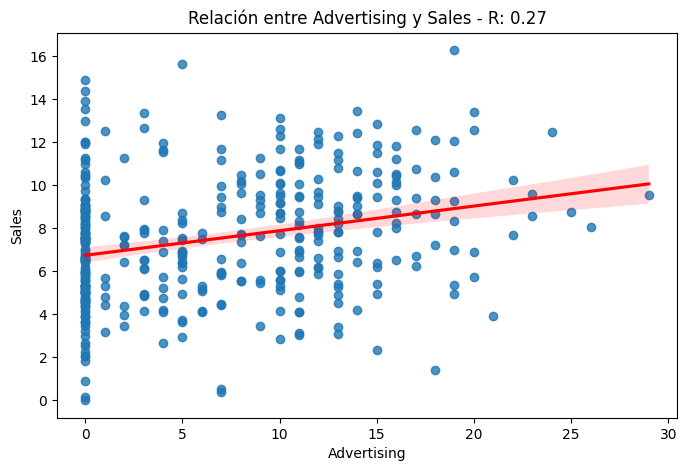

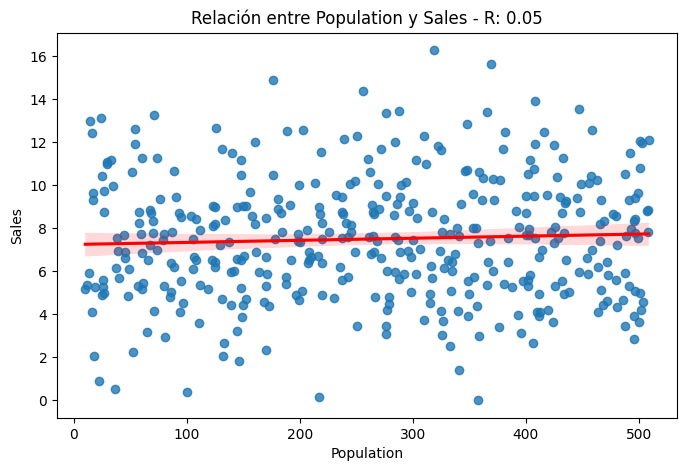

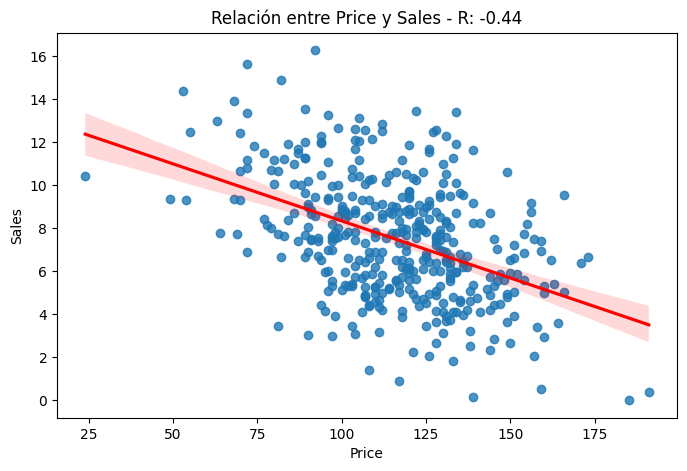

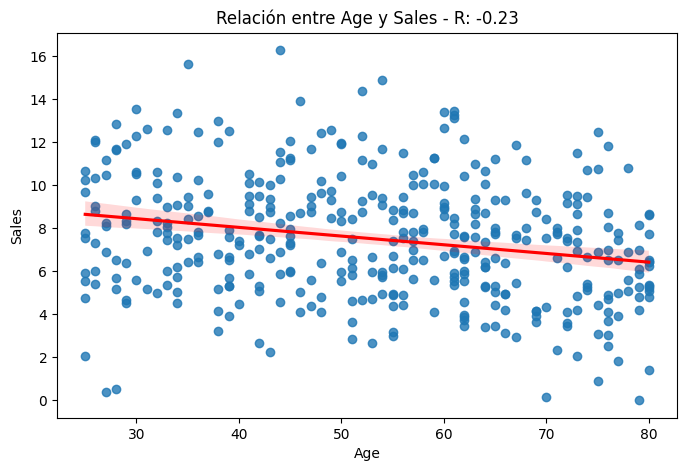

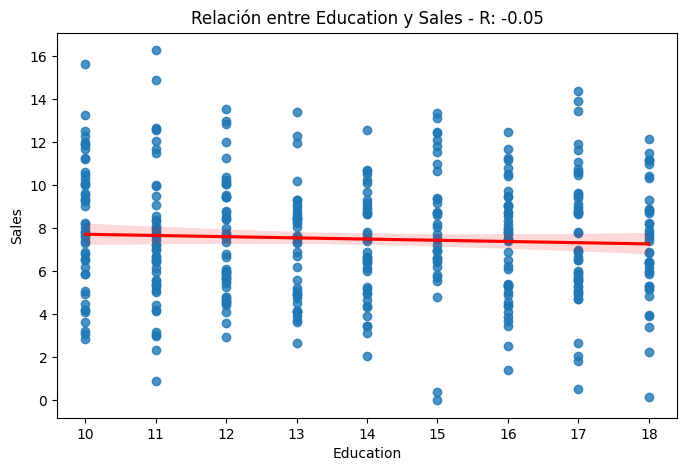

In [ ]:
explorar_relacion_con_salida(data, "Sales")

<ipython-input-80-ec32f4383150>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




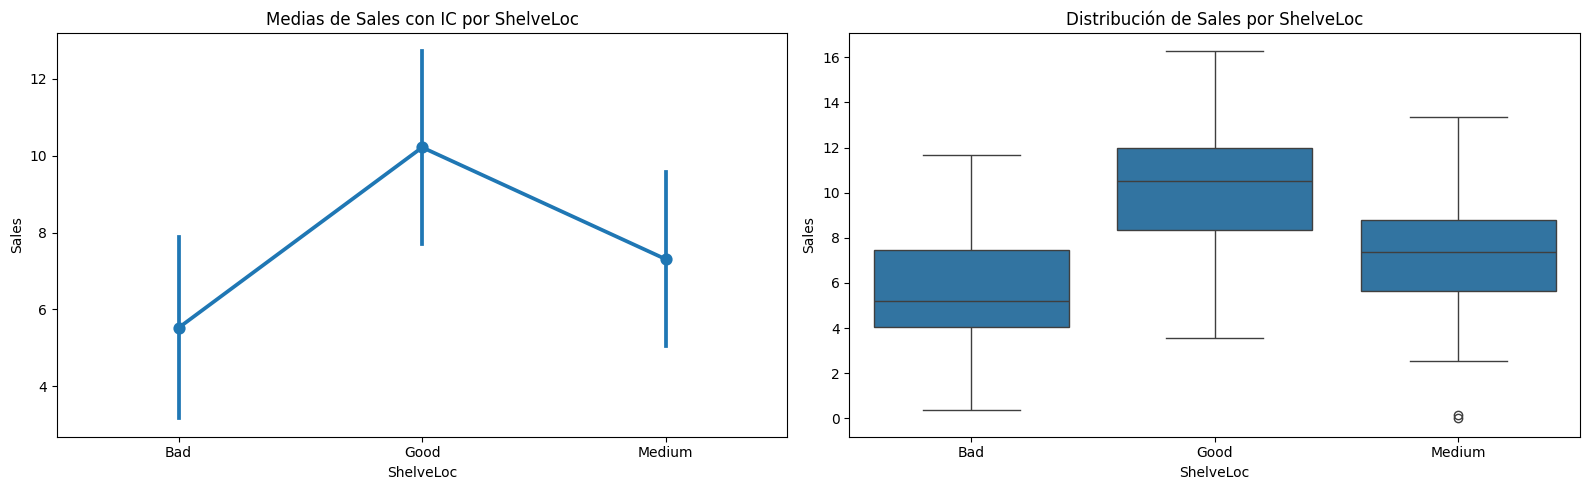

<ipython-input-80-ec32f4383150>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




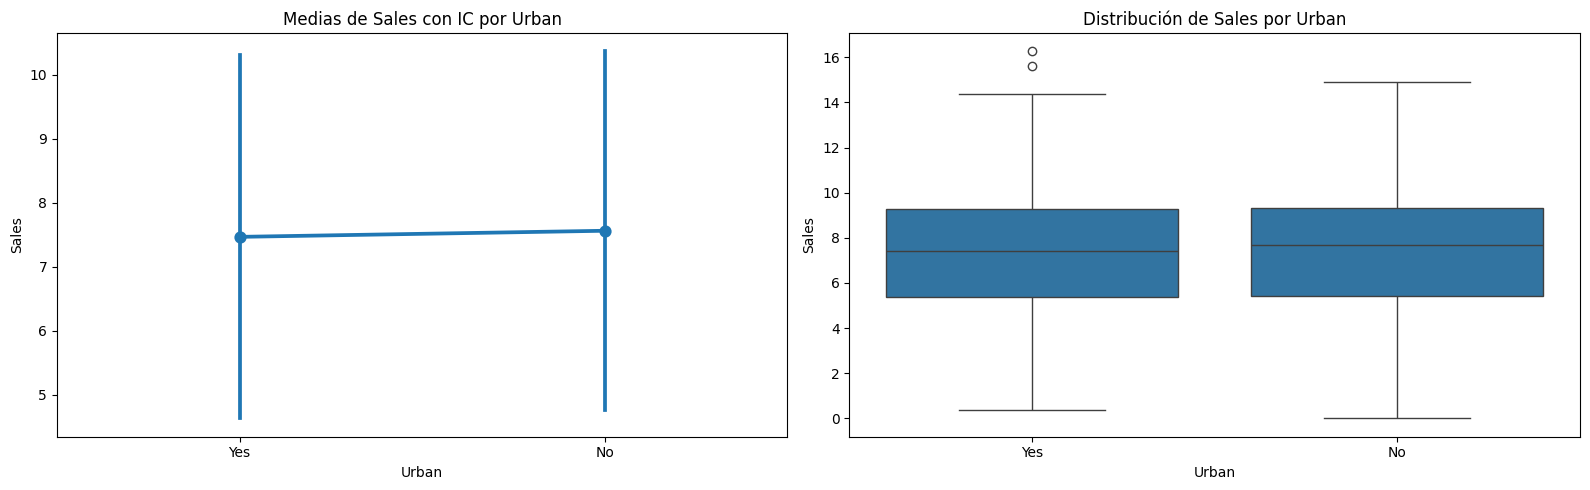

<ipython-input-80-ec32f4383150>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




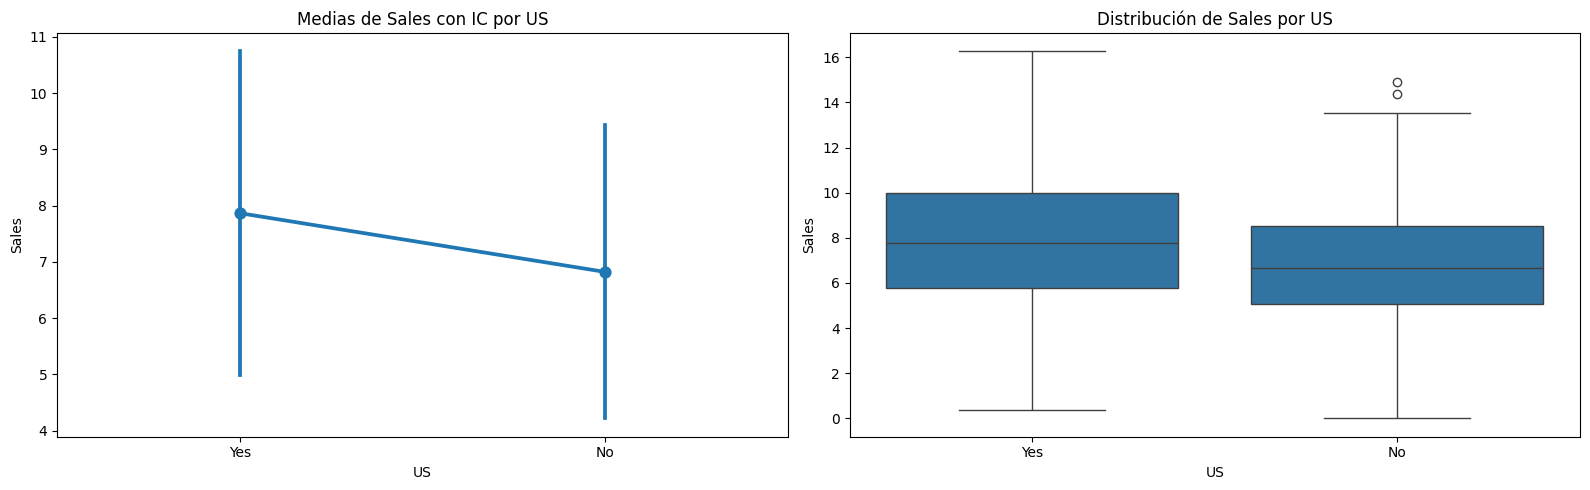

In [ ]:
explorar_relacion_cuantitativa_categorica(data, "Sales")